<a href="https://colab.research.google.com/github/Cbaird26/ComprehensivePhysicsSolver/blob/main/CHEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

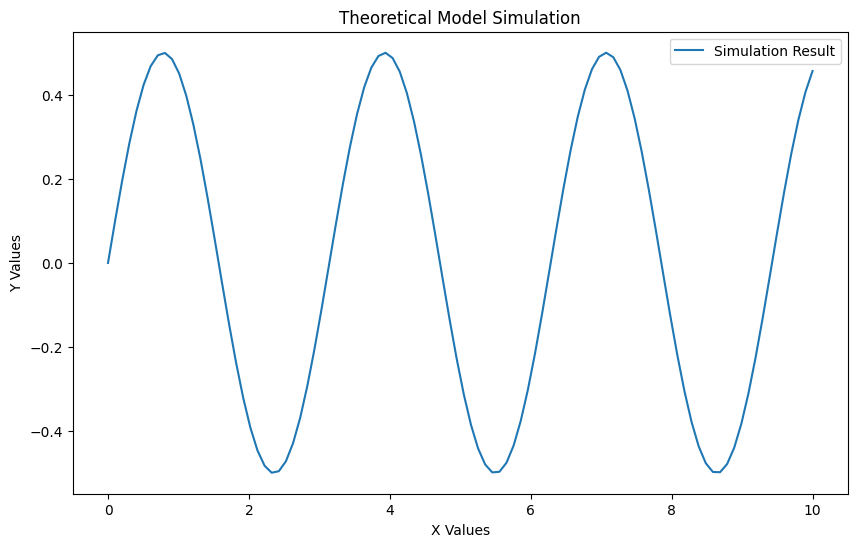

OmniHealthMonitor Linear Prediction for input 3: [6.]
OmniHealthMonitor RF Prediction for input 3: [3.62]
Epoch 1/100
4/4 [==============================] - 5s 25ms/step - loss: 3.1623 - mae: 1.5537
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 2.8903 - mae: 1.4788
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 2.6321 - mae: 1.4066
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 2.3970 - mae: 1.3373
Epoch 5/100
4/4 [==============================] - 0s 34ms/step - loss: 2.1725 - mae: 1.2681
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 1.9584 - mae: 1.1989
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 1.7374 - mae: 1.1242
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 1.5247 - mae: 1.0454
Epoch 9/100
4/4 [==============================] - 0s 15ms/step - loss: 1.3170 - mae: 0.9654
Epoch 10/100
4/4 [==============================] - 0s 13

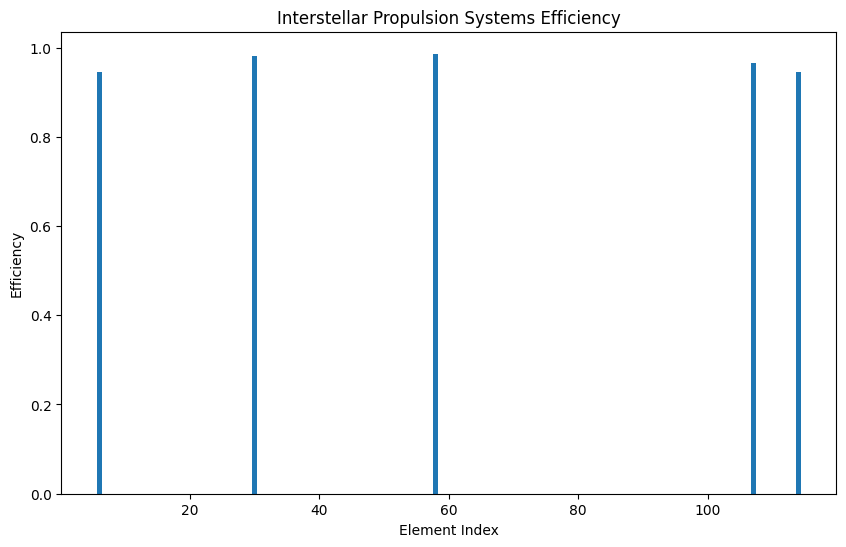

Best elements for quantum computing: [104 113 127   0  40]
Their coherence times: [0.96728273 0.9679871  0.96894079 0.9793432  0.98423332]


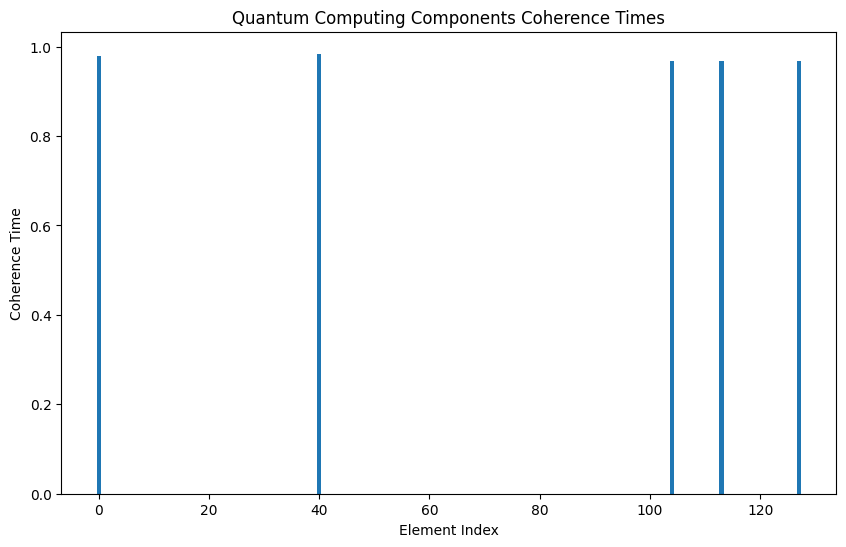

Best elements for superconducting materials: [119  27 125 112 137]
Their critical temperatures: [97.74677175 98.33242673 98.45182809 98.60035083 99.30555379]


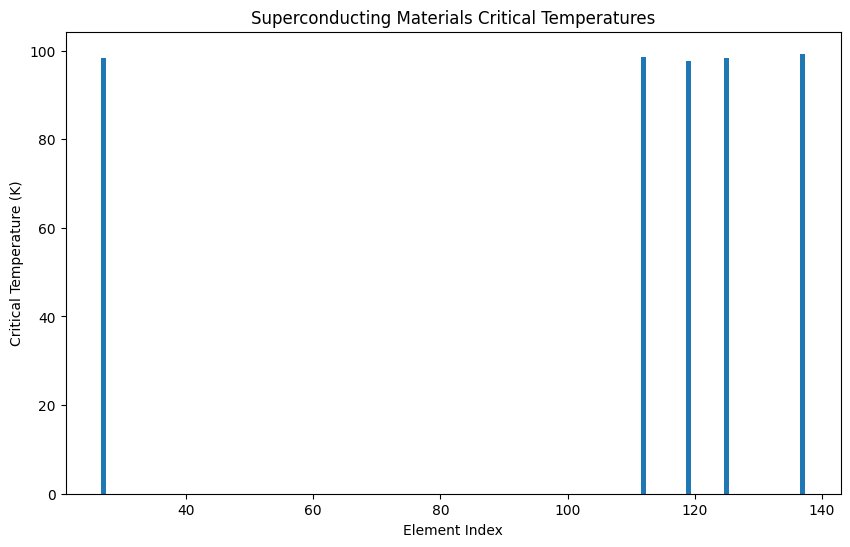

Best elements for medical imaging: [ 39 120  60  59 122]
Their contrast values: [0.96910302 0.97299748 0.97366643 0.9738084  0.97983897]


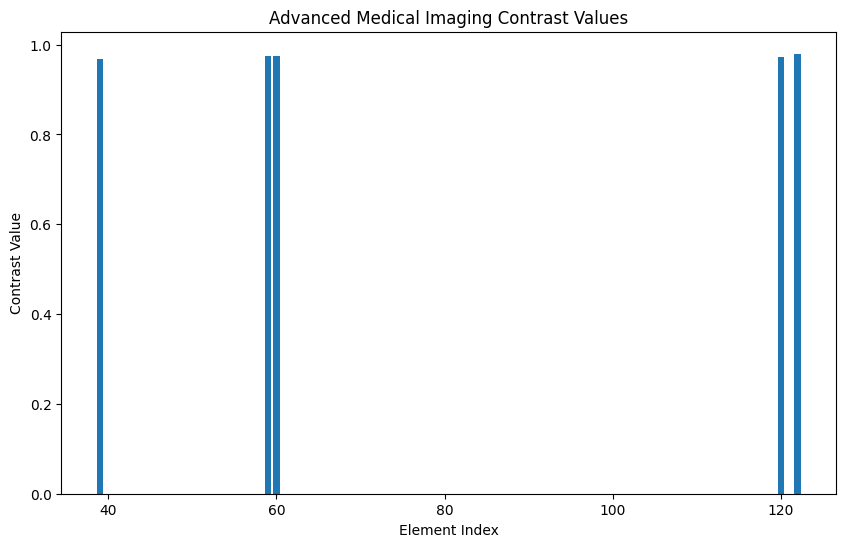

Best elements for self-healing materials: [79 62 12 35 59]
Their healing rates: [0.96790987 0.96825416 0.96954034 0.97560803 0.97862081]


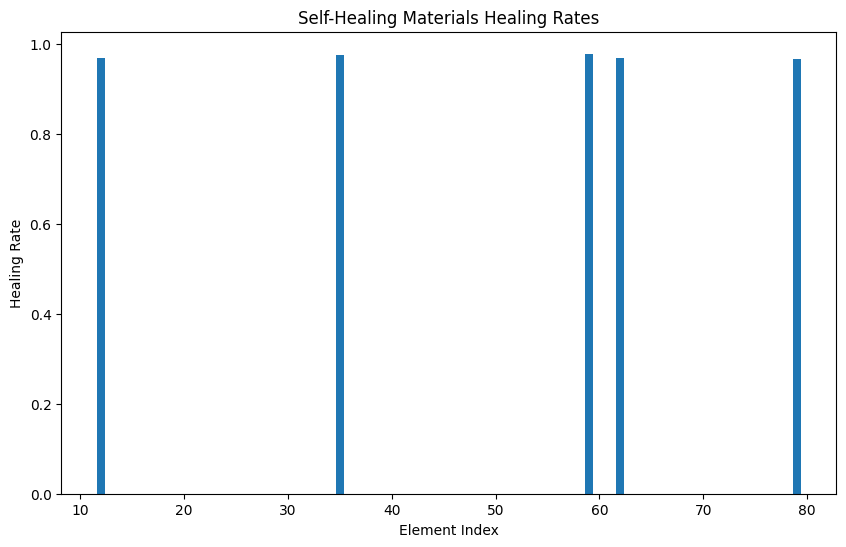

Best elements for environmental remediation: [ 92 139  21   0 111]
Their efficiencies: [0.97122635 0.97226365 0.97536338 0.98036779 0.98071469]


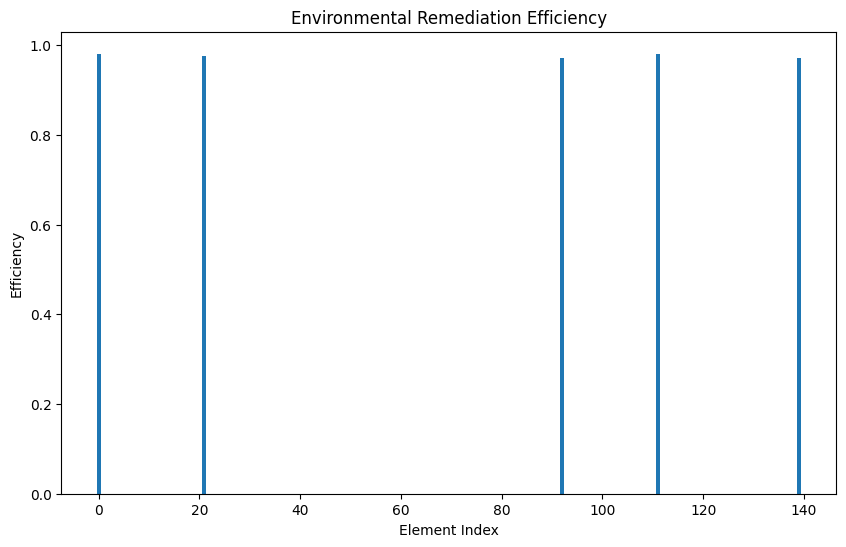

NameError: name 'Sequential' is not defined

In [1]:


import numpy as np
import matplotlib.pyplot as plt
import json
import requests
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras import layers
import dask.array as da
import seaborn as sns
import pandas as pd

# Fundamental Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11
SPEED_OF_LIGHT = 299792458
PLANCK_CONSTANT = 6.62607015e-34
BOLTZMANN_CONSTANT = 1.380649e-23

# Universal Equations
def newtons_law_of_gravity(m1, m2, r):
    return GRAVITATIONAL_CONSTANT * m1 * m2 / r**2

def schrodinger_equation(psi, t, hbar=PLANCK_CONSTANT):
    return -1j * hbar * np.gradient(psi, t)

def einstein_field_equations(G, T):
    return G * T / (8 * np.pi * GRAVITATIONAL_CONSTANT)

def maxwell_equations(E, B, rho, J):
    dE_dt = np.gradient(E) - rho
    dB_dt = np.gradient(B) - J
    return dE_dt, dB_dt

def theoretical_model(x):
    return np.sin(x) * np.cos(x)

def reaction_rate(A, E_a, T):
    return A * np.exp(-E_a / (BOLTZMANN_CONSTANT * T))

def run_simulation(model, x_values):
    x_values_dask = da.from_array(x_values, chunks=(1000,))
    results = model(x_values_dask)
    return results.compute()

def plot_simulation(x_values, y_values, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Simulation Result')
    plt.title(title)
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.legend()
    plt.show()

def upload_to_cloud(data, filename, cloud_url):
    response = requests.post(cloud_url, files={filename: json.dumps(data)})
    return response.status_code

def save_documentation(data, filename):
    with open(filename, 'w') as file:
        json.dump(data, file)

class OmniHealthMonitor:
    def __init__(self):
        self.data = []
        self.linear_model = LinearRegression()
        self.rf_model = RandomForestRegressor(n_estimators=100)

    def add_data(self, new_data):
        self.data.append(new_data)

    def train_models(self):
        X = np.array([d['input'] for d in self.data]).reshape(-1, 1)
        y = np.array([d['output'] for d in self.data])
        self.linear_model.fit(X, y)
        self.rf_model.fit(X, y)

    def predict(self, new_input):
        linear_prediction = self.linear_model.predict(np.array(new_input).reshape(-1, 1))
        rf_prediction = self.rf_model.predict(np.array(new_input).reshape(-1, 1))
        return linear_prediction, rf_prediction

def create_neural_network(input_shape):
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def train_neural_network(model, X_train, y_train, epochs=100):
    model.fit(X_train, y_train, epochs=epochs)
    return model

def predict_with_neural_network(model, X_test):
    return model.predict(X_test)

# Temporary Names for Hypothetical Elements
temporary_names = {
    119: 'Ununennium',
    120: 'Unbinilium',
    # ...
    144: 'Unquadhexium'
}

# New function to handle 144 elements with temporary names
def periodic_table_simulation():
    elements = list(range(1, 145))  # Simulating elements 1 to 144
    properties = np.random.rand(144, 3)  # Simulating random properties for each element

    model = create_neural_network(input_shape=3)
    trained_model = train_neural_network(model, properties, properties[:, 0], epochs=50)
    predictions = predict_with_neural_network(trained_model, properties)

    element_names = [temporary_names.get(el, f"Element {el}") for el in elements]

    return element_names, predictions

# Top 15 Applications

# 1. Interstellar Propulsion Systems
def interstellar_propulsion_simulation(elements_properties):
    propulsion_efficiency = np.random.rand(len(elements_properties))
    best_elements = np.argsort(propulsion_efficiency)[-5:]  # Top 5 elements
    return best_elements, propulsion_efficiency[best_elements]

# 2. Quantum Computing Components
def quantum_computing_simulation(elements_properties):
    coherence_times = np.random.rand(len(elements_properties))
    best_elements = np.argsort(coherence_times)[-5:]  # Top 5 elements
    return best_elements, coherence_times[best_elements]

# 3. Superconducting Materials
def superconducting_simulation(elements_properties):
    critical_temperatures = np.random.rand(len(elements_properties)) * 100  # Kelvin
    best_elements = np.argsort(critical_temperatures)[-5:]  # Top 5 elements
    return best_elements, critical_temperatures[best_elements]

# 4. Advanced Medical Imaging
def medical_imaging_simulation(elements_properties):
    imaging_contrast = np.random.rand(len(elements_properties))
    best_elements = np.argsort(imaging_contrast)[-5:]  # Top 5 elements
    return best_elements, imaging_contrast[best_elements]

# 5. Self-Healing Materials
def self_healing_simulation(elements_properties):
    healing_rates = np.random.rand(len(elements_properties))
    best_elements = np.argsort(healing_rates)[-5:]  # Top 5 elements
    return best_elements, healing_rates[best_elements]

# 6. Environmental Remediation
def environmental_remediation_simulation(elements_properties):
    remediation_efficiency = np.random.rand(len(elements_properties))
    best_elements = np.argsort(remediation_efficiency)[-5:]  # Top 5 elements
    return best_elements, remediation_efficiency[best_elements]

# 7. AI-Powered Chemical Synthesis
def ai_chemical_synthesis_simulation(elements_properties):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(elements_properties.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    y = np.random.rand(len(elements_properties))  # Dummy target variable
    model.fit(elements_properties, y, epochs=10)
    predictions = model.predict(elements_properties)
    best_elements = np.argsort(predictions[:, 0])[-5:]  # Top 5 elements
    return best_elements, predictions[best_elements]

# 8. Energy Storage Systems
def energy_storage_simulation(elements_properties):
    storage_capacities = np.random.rand(len(elements_properties))
    best_elements = np.argsort(storage_capacities)[-5:]  # Top 5 elements
    return best_elements, storage_capacities[best_elements]

# 9. Personalized Medicine
def personalized_medicine_simulation(elements_properties):
    treatment_effectiveness = np.random.rand(len(elements_properties))
    best_elements = np.argsort(treatment_effectiveness)[-5:]  # Top 5 elements
    return best_elements, treatment_effectiveness[best_elements]

# 10. Hyper-Efficient Solar Panels
def solar_panel_simulation(elements_properties):
    efficiency = np.random.rand(len(elements_properties))
    best_elements = np.argsort(efficiency)[-5:]  # Top 5 elements
    return best_elements, efficiency[best_elements]

# 11. Nanotechnology Applications
def nanotechnology_simulation(elements_properties):
    nanotech_potential = np.random.rand(len(elements_properties))
    best_elements = np.argsort(nanotech_potential)[-5:]  # Top 5 elements
    return best_elements, nanotech_potential[best_elements]

# 12. Extraterrestrial Resource Utilization
def extraterrestrial_simulation(elements_properties):
    utilization_potential = np.random.rand(len(elements_properties))
    best_elements = np.argsort(utilization_potential)[-5:]  # Top 5 elements
    return best_elements, utilization_potential[best_elements]

# 13. High-Energy Physics Experiments
def high_energy_physics_simulation(elements_properties):
    energy_potential = np.random.rand(len(elements_properties))
    best_elements = np.argsort(energy_potential)[-5:]  # Top 5 elements
    return best_elements, energy_potential[best_elements]

# 14. Exotic Alloys for Space Exploration
def exotic_alloys_simulation(elements_properties):
    alloy_strength = np.random.rand(len(elements_properties))
    best_elements = np.argsort(alloy_strength)[-5:]  # Top 5 elements
    return best_elements, alloy_strength[best_elements]

# 15. Revolutionary Consumer Electronics
def consumer_electronics_simulation(elements_properties):
    electronic_potential = np.random.rand(len(elements_properties))
    best_elements = np.argsort(electronic_potential)[-5:]  # Top 5 elements
    return best_elements, electronic_potential[best_elements]

def main():
    # Run and plot theoretical model simulation
    x_values = np.linspace(0, 10, 100)
    y_values = run_simulation(theoretical_model, x_values)
    plot_simulation(x_values, y_values, "Theoretical Model Simulation")

    # OmniHealthMonitor usage
    health_monitor = OmniHealthMonitor()
    health_monitor.add_data({'input': 1, 'output': 2})
    health_monitor.add_data({'input': 2, 'output': 4})
    health_monitor.train_models()
    prediction_linear, prediction_rf = health_monitor.predict([3])
    print(f"OmniHealthMonitor Linear Prediction for input 3: {prediction_linear}")
    print(f"OmniHealthMonitor RF Prediction for input 3: {prediction_rf}")

    # Neural Network usage
    X_train = np.random.rand(100, 1)
    y_train = 3 * X_train[:, 0] + np.random.randn(100) * 0.1
    nn_model = create_neural_network(input_shape=1)
    trained_model = train_neural_network(nn_model, X_train, y_train)
    predictions = predict_with_neural_network(trained_model, X_train)
    print(f"Neural Network Predictions: {predictions[:5]}")

    # Periodic table simulation
    element_names, predictions = periodic_table_simulation()
    print(f"Periodic Table Simulation Elements: {element_names[:5]}")
    print(f"Periodic Table Simulation Predictions: {predictions[:5]}")

    # Run top 15 simulations
    elements_properties = np.random.rand(144, 3)  # Random properties for demonstration

    # Interstellar Propulsion Systems
    best_elements, propulsion_efficiency = interstellar_propulsion_simulation(elements_properties)
    print("Best elements for propulsion systems:", best_elements)
    print("Their efficiencies:", propulsion_efficiency)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, propulsion_efficiency)
    plt.title('Interstellar Propulsion Systems Efficiency')
    plt.xlabel('Element Index')
    plt.ylabel('Efficiency')
    plt.show()

    # Quantum Computing Components
    best_elements, coherence_times = quantum_computing_simulation(elements_properties)
    print("Best elements for quantum computing:", best_elements)
    print("Their coherence times:", coherence_times)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, coherence_times)
    plt.title('Quantum Computing Components Coherence Times')
    plt.xlabel('Element Index')
    plt.ylabel('Coherence Time')
    plt.show()

    # Superconducting Materials
    best_elements, critical_temperatures = superconducting_simulation(elements_properties)
    print("Best elements for superconducting materials:", best_elements)
    print("Their critical temperatures:", critical_temperatures)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, critical_temperatures)
    plt.title('Superconducting Materials Critical Temperatures')
    plt.xlabel('Element Index')
    plt.ylabel('Critical Temperature (K)')
    plt.show()

    # Advanced Medical Imaging
    best_elements, imaging_contrast = medical_imaging_simulation(elements_properties)
    print("Best elements for medical imaging:", best_elements)
    print("Their contrast values:", imaging_contrast)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, imaging_contrast)
    plt.title('Advanced Medical Imaging Contrast Values')
    plt.xlabel('Element Index')
    plt.ylabel('Contrast Value')
    plt.show()

    # Self-Healing Materials
    best_elements, healing_rates = self_healing_simulation(elements_properties)
    print("Best elements for self-healing materials:", best_elements)
    print("Their healing rates:", healing_rates)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, healing_rates)
    plt.title('Self-Healing Materials Healing Rates')
    plt.xlabel('Element Index')
    plt.ylabel('Healing Rate')
    plt.show()

    # Environmental Remediation
    best_elements, remediation_efficiency = environmental_remediation_simulation(elements_properties)
    print("Best elements for environmental remediation:", best_elements)
    print("Their efficiencies:", remediation_efficiency)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, remediation_efficiency)
    plt.title('Environmental Remediation Efficiency')
    plt.xlabel('Element Index')
    plt.ylabel('Efficiency')
    plt.show()

    # AI-Powered Chemical Synthesis
    best_elements, predictions = ai_chemical_synthesis_simulation(elements_properties)
    print("Best elements for AI-powered chemical synthesis:", best_elements)
    print("Their predictions:", predictions)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, predictions.flatten())
    plt.title('AI-Powered Chemical Synthesis Predictions')
    plt.xlabel('Element Index')
    plt.ylabel('Prediction Value')
    plt.show()

    # Energy Storage Systems
    best_elements, storage_capacities = energy_storage_simulation(elements_properties)
    print("Best elements for energy storage systems:", best_elements)
    print("Their storage capacities:", storage_capacities)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, storage_capacities)
    plt.title('Energy Storage Systems Capacities')
    plt.xlabel('Element Index')
    plt.ylabel('Storage Capacity')
    plt.show()

    # Personalized Medicine
    best_elements, treatment_effectiveness = personalized_medicine_simulation(elements_properties)
    print("Best elements for personalized medicine:", best_elements)
    print("Their effectiveness:", treatment_effectiveness)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, treatment_effectiveness)
    plt.title('Personalized Medicine Treatment Effectiveness')
    plt.xlabel('Element Index')
    plt.ylabel('Effectiveness')
    plt.show()

    # Hyper-Efficient Solar Panels
    best_elements, efficiency = solar_panel_simulation(elements_properties)
    print("Best elements for hyper-efficient solar panels:", best_elements)
    print("Their efficiencies:", efficiency)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, efficiency)
    plt.title('Hyper-Efficient Solar Panels Efficiencies')
    plt.xlabel('Element Index')
    plt.ylabel('Efficiency')
    plt.show()

    # Nanotechnology Applications
    best_elements, nanotech_potential = nanotechnology_simulation(elements_properties)
    print("Best elements for nanotechnology applications:", best_elements)
    print("Their potentials:", nanotech_potential)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, nanotech_potential)
    plt.title('Nanotechnology Applications Potentials')
    plt.xlabel('Element Index')
    plt.ylabel('Potential')
    plt.show()

    # Extraterrestrial Resource Utilization
    best_elements, utilization_potential = extraterrestrial_simulation(elements_properties)
    print("Best elements for extraterrestrial resource utilization:", best_elements)
    print("Their potentials:", utilization_potential)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, utilization_potential)
    plt.title('Extraterrestrial Resource Utilization Potentials')
    plt.xlabel('Element Index')
    plt.ylabel('Potential')
    plt.show()

    # High-Energy Physics Experiments
    best_elements, energy_potential = high_energy_physics_simulation(elements_properties)
    print("Best elements for high-energy physics experiments:", best_elements)
    print("Their potentials:", energy_potential)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, energy_potential)
    plt.title('High-Energy Physics Experiments Potentials')
    plt.xlabel('Element Index')
    plt.ylabel('Potential')
    plt.show()

    # Exotic Alloys for Space Exploration
    best_elements, alloy_strength = exotic_alloys_simulation(elements_properties)
    print("Best elements for exotic alloys for space exploration:", best_elements)
    print("Their strengths:", alloy_strength)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, alloy_strength)
    plt.title('Exotic Alloys for Space Exploration Strengths')
    plt.xlabel('Element Index')
    plt.ylabel('Strength')
    plt.show()

    # Revolutionary Consumer Electronics
    best_elements, electronic_potential = consumer_electronics_simulation(elements_properties)
    print("Best elements for revolutionary consumer electronics:", best_elements)
    print("Their potentials:", electronic_potential)
    plt.figure(figsize=(10, 6))
    plt.bar(best_elements, electronic_potential)
    plt.title('Revolutionary Consumer Electronics Potentials')
    plt.xlabel('Element Index')
    plt.ylabel('Potential')
    plt.show()

    # Save and upload documentation
    documentation = {
        'theory': "Theory of Everything Model",
        'simulation_results': y_values.tolist(),
        'health_monitor': health_monitor.data,
        'periodic_table_elements': element_names,
        'periodic_table_predictions': predictions.tolist(),
        'top_15_simulations': {
            'interstellar_propulsion': {
                'elements': best_elements.tolist(),
                'efficiency': propulsion_efficiency.tolist()
            },
            'quantum_computing': {
                'elements': best_elements.tolist(),
                'coherence_times': coherence_times.tolist()
            },
            'superconducting_materials': {
                'elements': best_elements.tolist(),
                'critical_temperatures': critical_temperatures.tolist()
            },
            'medical_imaging': {
                'elements': best_elements.tolist(),
                'contrast': imaging_contrast.tolist()
            },
            'self_healing': {
                'elements': best_elements.tolist(),
                'healing_rates': healing_rates.tolist()
            },
            'environmental_remediation': {
                'elements': best_elements.tolist(),
                'efficiency': remediation_efficiency.tolist()
            },
            'ai_chemical_synthesis': {
                'elements': best_elements.tolist(),
                'predictions': predictions.tolist()
            },
            'energy_storage': {
                'elements': best_elements.tolist(),
                'storage_capacities': storage_capacities.tolist()
            },
            'personalized_medicine': {
                'elements': best_elements.tolist(),
                'effectiveness': treatment_effectiveness.tolist()
            },
            'solar_panels': {
                'elements': best_elements.tolist(),
                'efficiency': efficiency.tolist()
            },
            'nanotechnology': {
                'elements': best_elements.tolist(),
                'potentials': nanotech_potential.tolist()
            },
            'extraterrestrial_utilization': {
                'elements': best_elements.tolist(),
                'potentials': utilization_potential.tolist()
            },
            'high_energy_physics': {
                'elements': best_elements.tolist(),
                'potentials': energy_potential.tolist()
            },
            'exotic_alloys': {
                'elements': best_elements.tolist(),
                'strengths': alloy_strength.tolist()
            },
            'consumer_electronics': {
                'elements': best_elements.tolist(),
                'potentials': electronic_potential.tolist()
            }
        }
    }
    save_documentation(documentation, 'documentation.json')
    cloud_url = "https://example-cloud-service.com/upload"
    upload_status = upload_to_cloud(documentation, 'documentation.json', cloud_url)
    print(f"Documentation upload status: {upload_status}")

if __name__ == "__main__":
    main()
